In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import scikitplot as skplt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import PCA
#from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import FunctionTransformer
from copy import copy

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot


In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [4]:
# Create specificity scoring function
from sklearn.metrics import make_scorer
spec_score = make_scorer(metrics.recall_score,pos_label=0)

In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.shape

(569, 33)

In [8]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data.drop("Unnamed: 32", axis = 1, inplace = True)

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [12]:
data.shape

(569, 32)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

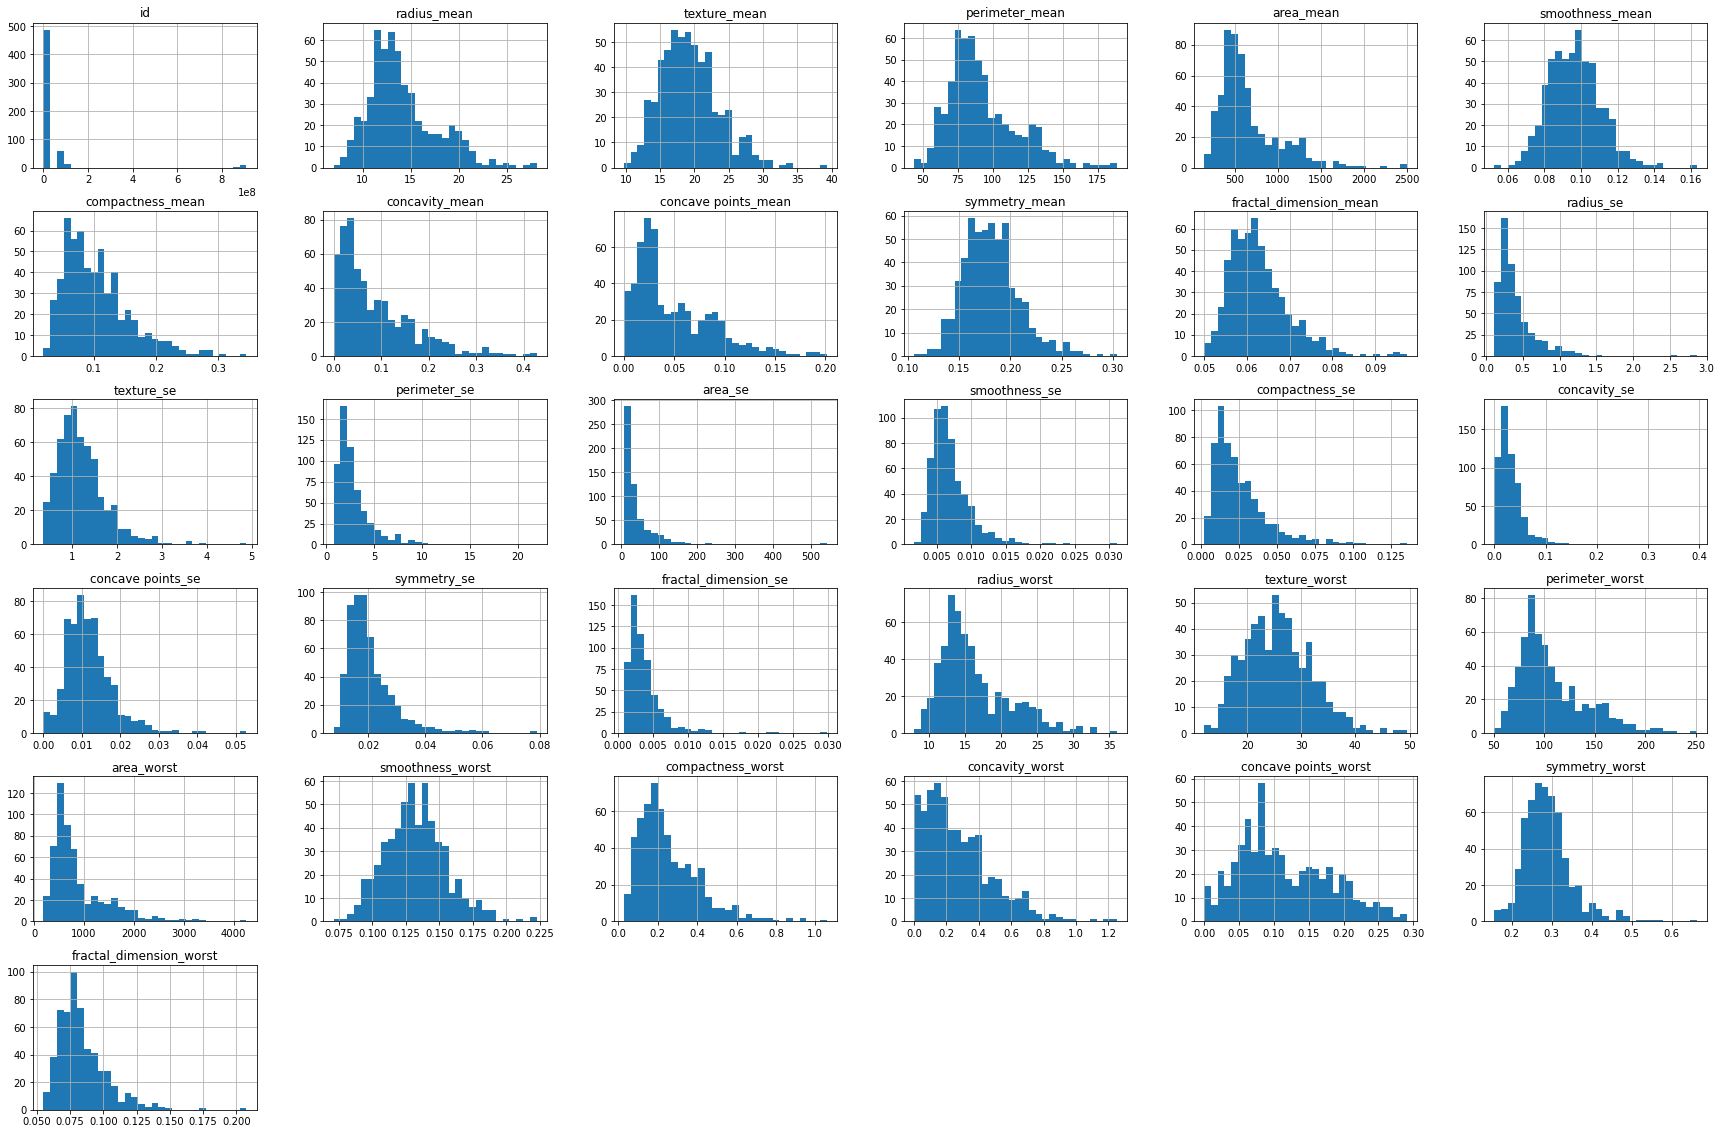

In [13]:
data.hist(bins=30, figsize=(30, 20))

In [14]:
corr = data.corr()

In [15]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

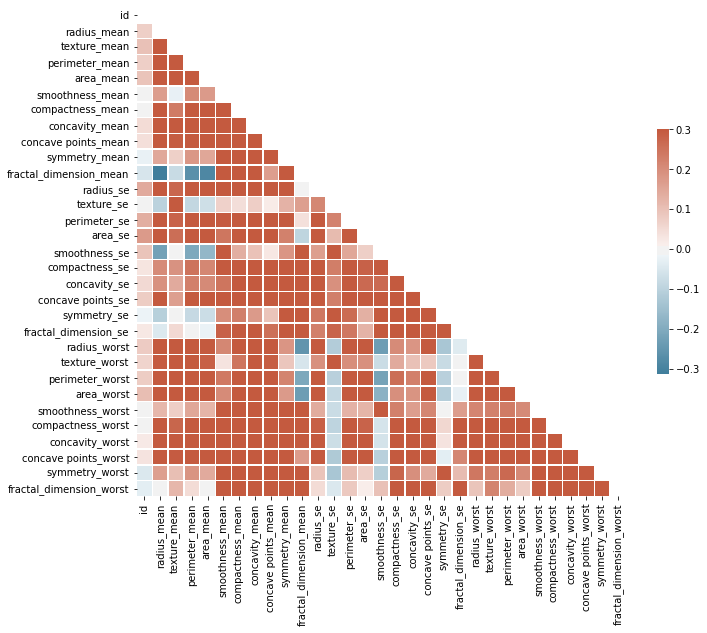

In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# plot the heatmap
sns.heatmap(corr, cmap = cmap, mask = mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Train Test Split

In [17]:
# Set seed value
random_seed= 123

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(random_seed)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(random_seed)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(random_seed)

In [18]:
# convert target to binary
# creating a dict file  
status = {'B': 0,'M': 1} 
  
# traversing through dataframe 
# Gender column and writing `b
# values where key matches 
data.diagnosis = [status[item] for item in data.diagnosis] 

In [19]:
data.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

In [20]:
X = data.drop(['id','diagnosis'], axis = 1)
X_trans = pd.DataFrame(StandardScaler().fit_transform(X), columns =  X.columns, index = X.index)

In [21]:
X_trans

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [22]:
y = data['diagnosis']

In [23]:
train_class = data['diagnosis'].values

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X_trans, y,
                                stratify = train_class,
                                train_size=0.70, test_size=0.30, 
                                random_state = random_seed)

In [25]:
X_train.shape

(398, 30)

# 1. Feature Selection

## a) PCA DATA from R

In [26]:
pc_X_test = pd.read_csv('pc_X_test.csv')
pc_y_test = pd.read_csv('pc_y_test.csv')

In [27]:
pc_X_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,id
0,-8.940998,-1.772884,0.378868,-3.597647,-1.882450,-1.530738,1
1,-3.724579,1.984048,-1.606399,-2.882106,-0.584680,1.355490,2
2,-2.328521,-3.871317,2.563675,-0.995599,-1.336860,0.155465,3
3,-2.193514,2.672962,1.589669,-0.243448,-0.017117,0.097959,4
4,-2.114900,-2.317467,0.664839,0.350623,-1.575664,0.944581,5


In [28]:
pc_X_test = pc_X_test.drop('id', axis = 1)

In [29]:
pc_X_train = pd.read_csv('pc_X_train.csv')
pc_y_train = pd.read_csv('pc_y_train.csv')

## b) XGBoost Feature Selection using Feature Importances 

In [30]:
def feat_select(X_train, y_train): 
    
    from sklearn.feature_selection import SelectFromModel
    from numpy import sort

    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    thresholds = np.sort(xgb.feature_importances_)[::-1]

    feature_thresh = pd.DataFrame(columns = ['Thresh', 'n', 'Accuracy'])
    columns = list(feature_thresh)
    data = []

    thresh_limit = 1

    for thresh in thresholds:

        #to Stop the loop if the threshold no longer improves

        if thresh >= thresh_limit:
            break

        #select features using threshold
        selection =  SelectFromModel(xgb, threshold = thresh, prefit = True)
        select_X_train = selection.transform(X_train)

        #train model
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)

        #evaluate model
        select_X_test = selection.transform(X_test)
        predictions = selection_model.predict(select_X_test)
        accuracy = accuracy_score(y_test, predictions)


        #print("Thresh = %.3f, n = %d, Accuracy = %.3f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

        thresh_limit = thresh

        values = [thresh, select_X_train.shape[1], accuracy*100]
        zipped = zip(columns, values)
        values_dict = dict(zipped)
        data.append(values_dict)

    feature_thresh = feature_thresh.append(data, True)

    best_accuracy = feature_thresh[feature_thresh['Accuracy'] == feature_thresh['Accuracy'].max()]
    best_threshold = best_accuracy.Thresh.min()

    # transform training data based on the selected feature importances
    best_thresh = SelectFromModel(xgb, threshold = best_threshold, prefit = True)
    
    X_train_best = pd.DataFrame(best_thresh.transform(X_train))
    X_test_best = pd.DataFrame(best_thresh.transform(X_test))

    return X_train_best, X_test_best

In [31]:
X_train_best, X_test_best = feat_select(X_train, y_train)

In [32]:
X_train_best.shape

(398, 23)

# 2. MODELLING

## a) Stack Model No. 1 using Original X_train

In [33]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    #level0.append(('lsvm', LinearSVC()))
    #level0.append(('svm', SVC()))
    level0.append(('et', ExtraTreesClassifier()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('xgb', XGBClassifier()))
    
    
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [34]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    #models['lsvm'] = LinearSVC(C=15.0, dual=False, 
                               #loss='squared_hinge', 
                               #penalty='l2', tol=0.01)
    models['et'] = ExtraTreesClassifier(bootstrap=False, 
                     criterion = 'entropy', 
                     max_features=0.35000000000000003, 
                     min_samples_leaf=18, 
                     min_samples_split=9, 
                     n_estimators=100)
    #models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['xgb'] = XGBClassifier()
    models['stacking'] = get_stacking()
    return models

In [35]:
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, 
                             #scoring='roc_auc', 
                             scoring = 'recall',
                             cv=cv, 
                             n_jobs=-1, 
                             error_score='raise')
    return scores

In [36]:
# get the models to evaluate
models = get_models()

In [37]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.964 (0.041)
>knn 0.928 (0.052)
>cart 0.908 (0.071)
>et 0.899 (0.051)
>bayes 0.881 (0.073)
>xgb 0.942 (0.048)
>stacking 0.953 (0.043)


In [38]:
# Apply Stack model
stackmodel = models['stacking'].fit(X_train, y_train)

In [39]:
y_pred = stackmodel.predict(X_test)

In [40]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test, y_pred, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.966


In [41]:
recall = metrics.recall_score(y_test,y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.969


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.963


In [43]:
test_data = X_test.copy()

In [44]:
test_data['diagnosis'] = y_test

In [45]:
test_data['pred_diagnosis'] = y_pred

In [46]:
test_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,pred_diagnosis
115,-0.624062,0.521345,-0.635937,-0.615148,0.093918,-0.489914,-0.697043,-0.743876,-0.451325,-0.121575,...,-0.587413,-0.523125,0.772888,-0.091382,-0.584763,-0.641591,-0.748637,0.081139,0,0
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,...,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,0,0
382,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,0.537611,...,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899,0,0
136,-0.686545,-0.609610,-0.710491,-0.657810,0.621966,-0.822323,-0.663898,-0.591176,-1.725504,-0.474559,...,-0.628517,-0.586937,-0.230954,-0.963529,-0.804010,-0.684074,-1.923146,-0.582743,0,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,-0.189520,-0.125580,-0.186552,-0.295187,0.792763,0.179262,-0.587439,-0.448793,-0.323542,0.052790,...,-0.159688,-0.282643,1.316453,0.369820,-0.032568,0.427773,0.998566,0.149854,0,0
142,-0.766069,-0.460677,-0.754153,-0.730619,0.913744,-0.179679,-0.859881,-0.781794,-0.608315,0.400103,...,-0.732768,-0.663758,0.391516,-0.477519,-0.936038,-0.770256,-0.512441,-0.165462,0,0
238,0.026330,1.992051,0.023930,-0.088136,-1.005588,-0.008357,0.269940,-0.124821,-1.714551,-0.213719,...,-0.141817,-0.204943,-1.063835,-0.074206,0.164131,-0.493589,-1.635181,-0.331709,0,0
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251,0,0


In [47]:
test_data[test_data.diagnosis != test_data.pred_diagnosis]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,pred_diagnosis
157,0.770448,0.039642,0.676795,0.640807,-1.559255,-0.608551,-0.468292,-0.547068,0.118223,-1.434276,...,0.388371,0.266178,-1.956334,-0.529682,-0.402937,-0.460547,-0.604655,-1.342493,0,1
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903,1,0
541,0.097334,1.326510,0.158210,0.004297,-0.568632,0.353616,0.151924,-0.258434,0.220449,0.086813,...,0.185828,-0.126013,0.071514,1.055578,0.632369,0.089742,0.463080,1.017112,0,1
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432,0,1
81,-0.223602,-0.798102,-0.225682,-0.383638,0.814113,0.931636,0.352803,0.540406,0.476015,0.882089,...,-0.315766,-0.467048,0.930698,1.430264,1.024806,0.855640,1.013126,0.978321,0,1
297,-0.672344,-0.267531,-0.698958,-0.636479,0.236249,-0.856626,-0.777772,-0.355161,-0.703240,0.010262,...,-0.660090,-0.574808,-0.818354,-1.110223,-1.012222,-0.654838,-1.492816,-0.819922,1,0


## b) Stack Model No. 2 - using X_train_best from XGB Feature Importance Selection

In [48]:
# get a stacking ensemble of models
def get_stacking2():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    #level0.append(('lsvm', LinearSVC()))
    #level0.append(('svm', SVC()))
    level0.append(('et', ExtraTreesClassifier()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('xgb', XGBClassifier()))
    #level0.append(('mlp', MLPClassifier()))
    
    # define meta learner model
    level1 = LogisticRegression()
    
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [49]:
def get_models2():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    #models['lsvm'] = LinearSVC(C=15.0, dual=False, 
                               #loss='squared_hinge', 
                               #penalty='l2', tol=0.01)
    models['et'] = ExtraTreesClassifier(bootstrap=False, 
                     criterion = 'entropy', 
                     max_features=0.35000000000000003, 
                     min_samples_leaf=18, 
                     min_samples_split=9, 
                     n_estimators=100)
    #models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['xgb'] = XGBClassifier()
    #models['mlp'] = MLPClassifier()
    models['stacking'] = get_stacking2()
    return models

In [50]:
# evaluate a given model using cross-validation
def evaluate_model2(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, 
                             #scoring='roc_auc', 
                             scoring = 'recall',
                             cv=cv, 
                             n_jobs=-1, 
                             error_score='raise')
    return scores

In [51]:
# get the models to evaluate
models2 = get_models2()

In [52]:
results, names = list(), list()
for name, model in models2.items():
    scores = evaluate_model2(model, X_train_best, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.966 (0.042)
>knn 0.944 (0.046)
>cart 0.899 (0.062)
>et 0.901 (0.066)
>bayes 0.908 (0.068)
>xgb 0.944 (0.049)
>stacking 0.949 (0.048)


In [53]:
models2['stacking'].fit(X_train_best, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('et', ExtraTreesClassifier()),
                               ('bayes', GaussianNB()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              inter...,
                                              learning_rate=None,
                                              max_delta_step=None,
          

In [54]:
y_pred_best = models2['stacking'].predict(X_test_best)

In [55]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test, y_pred_best, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.966


In [56]:
recall = metrics.recall_score(y_test,y_pred_best,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.969


In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.963


## c) Stack Model 3 - using PCA 6 principal components

In [58]:
# get a stacking ensemble of models
def get_stacking3(n):
    # define the base models
    level0 = list()
    
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    #level0.append(('lsvm', LinearSVC()))
    #level0.append(('svm', SVC()))
    level0.append(('et', ExtraTreesClassifier()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('xgb', XGBClassifier()))
    #level0.append(('mlp', MLPClassifier()))
    
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [59]:
def get_models3(n):
    models = dict()
    
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    #models['lsvm'] = LinearSVC(C=15.0, dual=False, 
                               #loss='squared_hinge', 
                               #penalty='l2', tol=0.01)
    models['et'] = ExtraTreesClassifier(bootstrap=False, 
                     criterion = 'entropy', 
                     max_features=0.35000000000000003, 
                     min_samples_leaf=18, 
                     min_samples_split=9, 
                     n_estimators=100)
    #models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['xgb'] = XGBClassifier()
    #models['mlp'] = MLPClassifier()
    
    models['stacking'] = get_stacking3(n)
    return models

In [60]:
# evaluate a given model using cross-validation
def evaluate_model3(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, 
                             #scoring='roc_auc', 
                             scoring = 'recall',
                             cv=cv, 
                             n_jobs=-1, 
                             error_score='raise')
    return scores

In [61]:
# get the models with 6 Principal components to evaluate

models3 = get_models3(6)

In [62]:
results, names = list(), list()
for name, model in models3.items():
    scores = evaluate_model3(model, pc_X_train, pc_y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.967 (0.038)
>knn 0.915 (0.081)
>cart 0.877 (0.073)
>et 0.353 (0.174)
>bayes 0.886 (0.085)
>xgb 0.944 (0.062)
>stacking 0.951 (0.052)


In [63]:
models3['stacking'].fit(pc_X_train, pc_y_train.values.ravel())
y_pred = models3['stacking'].predict(pc_X_test)

In [64]:
fpr, tpr, thresholds  = metrics.roc_curve(pc_y_test, y_pred, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.932


In [65]:
recall = metrics.recall_score(pc_y_test,y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.873


In [66]:
tn, fp, fn, tp = confusion_matrix(pc_y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.991


In [67]:
confusion_matrix(pc_y_test, y_pred)

array([[106,   1],
       [  8,  55]], dtype=int64)

In [68]:
cf_matrix_stack = confusion_matrix(pc_y_test, y_pred)

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_stack.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_stack.flatten()/np.sum(cf_matrix_stack)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot:>

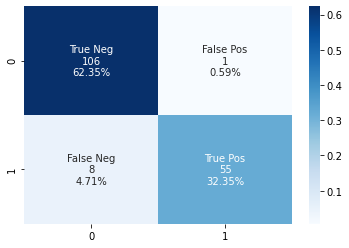

In [70]:
import seaborn as sns
sns.heatmap(cf_matrix_stack/np.sum(cf_matrix_stack), annot=labels, 
           fmt='', cmap='Blues')

## d) Stack Model 4 - using XGB + LR only

In [71]:
# get a stacking ensemble of models
def get_stacking4():
    # define the base models
    level0 = list()
    
    #level0.append(('lr', LogisticRegression()))
    #level0.append(('knn', KNeighborsClassifier()))
    #level0.append(('cart', DecisionTreeClassifier()))
    #level0.append(('lsvm', LinearSVC()))
    #level0.append(('svm', SVC()))
    #level0.append(('et', ExtraTreesClassifier()))
    #level0.append(('bayes', GaussianNB()))
    level0.append(('xgb', XGBClassifier()))
    #level0.append(('mlp', MLPClassifier()))
    
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [72]:
def get_models4():
    models = dict()
    
    #models['lr'] = LogisticRegression()
    #models['knn'] = KNeighborsClassifier()
    #models['cart'] = DecisionTreeClassifier()
    #models['lsvm'] = LinearSVC(C=15.0, dual=False, 
                               #loss='squared_hinge', 
                               #penalty='l2', tol=0.01)
    #models['et'] = ExtraTreesClassifier(bootstrap=False, 
    #                 criterion = 'entropy', 
    #                 max_features=0.35000000000000003, 
    #                 min_samples_leaf=18, 
    #                 min_samples_split=9, 
    #                 n_estimators=100)
    #models['svm'] = SVC()
    #models['bayes'] = GaussianNB()
    models['xgb'] = XGBClassifier()
    #models['mlp'] = MLPClassifier()
    
    models['stacking'] = get_stacking4()
    return models

In [73]:
# evaluate a given model using cross-validation
def evaluate_model4(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, 
                             #scoring='roc_auc', 
                             scoring = 'recall',
                             cv=cv, 
                             n_jobs=-1, 
                             error_score='raise')
    return scores

In [74]:
# get the models with 6 Principal components to evaluate

models4 = get_models4()

In [75]:
results, names = list(), list()
for name, model in models4.items():
    scores = evaluate_model4(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>xgb 0.942 (0.048)
>stacking 0.942 (0.048)


In [76]:
models4['stacking'].fit(X_train, y_train.values.ravel())
y_pred = models4['stacking'].predict(X_test)

In [77]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test, y_pred, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.970


In [78]:
recall = metrics.recall_score(y_test,y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.969


In [79]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.972


## e) XGB - default param + Original X_train

In [80]:
xgb = XGBClassifier()

In [81]:
xgbmod = xgb.fit(X_train, y_train)

In [82]:
y_pred = xgbmod.predict(X_test)

In [83]:
recall = metrics.recall_score(y_test,y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.969


In [84]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.963


In [85]:
confusion_matrix(y_test, y_pred)

array([[103,   4],
       [  2,  62]], dtype=int64)

In [86]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test, y_pred, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.966


In [87]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [88]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot:>

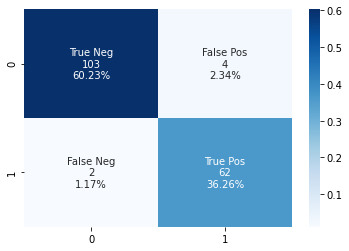

In [89]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, 
           fmt='', cmap='Blues')

In [90]:
y_pred_proba = xgbmod.predict_proba(X_test)

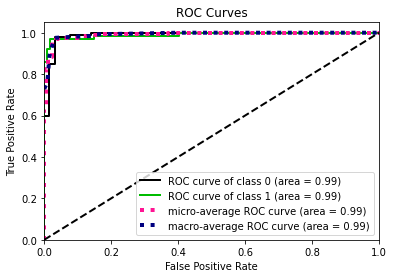

In [91]:
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

In [92]:
test_data = pd.concat([X_test, y_test], axis = 1, )

In [93]:
test_data.reset_index(inplace = True)

In [94]:
test_data['pred']= pd.Series(y_pred)

In [95]:
test_data.head()

,index,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,pred
0,115,-0.624062,0.521345,-0.635937,-0.615148,0.093918,-0.489914,-0.697043,-0.743876,-0.451325,...,-0.587413,-0.523125,0.772888,-0.091382,-0.584763,-0.641591,-0.748637,0.081139,0,0
1,21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,...,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,0,0
2,382,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,...,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899,0,0
3,136,-0.686545,-0.609610,-0.710491,-0.657810,0.621966,-0.822323,-0.663898,-0.591176,-1.725504,...,-0.628517,-0.586937,-0.230954,-0.963529,-0.804010,-0.684074,-1.923146,-0.582743,0,0
4,2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1,1


In [96]:
# False Negative
FN = test_data[(test_data['diagnosis'] == 1) & (test_data['pred'] == 0)]

In [97]:
FN

,index,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,pred
45,73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,...,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903,1,0
133,297,-0.672344,-0.267531,-0.698958,-0.636479,0.236249,-0.856626,-0.777772,-0.355161,-0.703240,...,-0.660090,-0.574808,-0.818354,-1.110223,-1.012222,-0.654838,-1.492816,-0.819922,1,0


In [98]:
# False Positive
FP = test_data[(test_data['diagnosis'] == 0) & (test_data['pred'] == 1)]

In [99]:
FP

,index,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,pred
11,148,0.088814,-0.956343,0.082420,-0.042062,0.237673,-0.042470,-0.049332,0.165104,-0.319891,...,0.039877,-0.199845,-0.033692,0.122361,0.182841,0.689670,-0.339339,-0.394329,0,1
13,157,0.770448,0.039642,0.676795,0.640807,-1.559255,-0.608551,-0.468292,-0.547068,0.118223,...,0.388371,0.266178,-1.956334,-0.529682,-0.402937,-0.460547,-0.604655,-1.342493,0,1
72,541,0.097334,1.326510,0.158210,0.004297,-0.568632,0.353616,0.151924,-0.258434,0.220449,...,0.185828,-0.126013,0.071514,1.055578,0.632369,0.089742,0.463080,1.017112,0,1
166,526,-0.189520,-0.125580,-0.186552,-0.295187,0.792763,0.179262,-0.587439,-0.448793,-0.323542,...,-0.159688,-0.282643,1.316453,0.369820,-0.032568,0.427773,0.998566,0.149854,0,1


### - Optuna Tune XGB <br>
https://medium.com/subex-ai-labs/efficient-hyperparameter-optimization-for-xgboost-model-using-optuna-3ee9a02566b1

In [100]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [101]:
def objective(trial: Trial, X, y):
    train_class = data['diagnosis'].values
    
    train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                        stratify = train_class,
                                                        test_size = 0.25, 
                                                        random_state = random_seed)
    
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 0,1000),
        "max_depth" : trial.suggest_int('max_depth', 2,25),
        'reg_alpha' : trial.suggest_int('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_int('reg_lambda', 0, 5),
        'min_child_weight' : trial.suggest_int('min_child_weight', 0,5),
        'gamma': trial.suggest_int('gamma', 0,5),
        'learning_rate':trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.1, 1, 0.01),
        'nthread' : -1,
        'objective' : 'reg:logistic'
        }
    
    model = XGBClassifier(**param)
    
    model.fit(train_X, train_y)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state= 1)
    
    return cross_val_score(model, 
                           test_X, 
                           test_y, 
                           cv = cv, 
                           scoring = 'recall',
                           n_jobs=-1, 
                           error_score='raise').mean()

In [102]:
study = optuna.create_study(direction = 'maximize', sampler = TPESampler(seed = random_seed))

# the code below just to be run once
#study.optimize(lambda trial: objective(trial, X, y), n_trials = 75)

[I 2020-10-31 15:05:41,561] A new study created in memory with name: no-name-c8649e78-7984-4444-971a-c176cddf7723


In [103]:
#print('Best trial: score {}, \nparams{}'.format(study.best_trial.value, study.best_trial.params))

In [104]:
# Optimization history
#history = study.trials_dataframe()
#history.tail()

In [105]:
# Visualize Optomisation History and Best Score at each point
#optuna.visualization.plot_optimization_history(study)

#optuna.visualization.plot_slice(study)

In [106]:
# save xgb best parameters
#joblib.dump(study.best_trial.params, 'xgb_best.pkl', compress = 1)

In [107]:
xgb_best_params = joblib.load('xgb_best.pkl')

In [108]:
xgb_best_params

{'n_estimators': 231,
 'max_depth': 13,
 'reg_alpha': 1,
 'reg_lambda': 0,
 'min_child_weight': 3,
 'gamma': 0,
 'learning_rate': 0.07869889535964729,
 'colsample_bytree': 0.75}

## f) XGB - Optimized Hyperparameter + Original X_train

In [181]:
xgb_f = XGBClassifier()
xgb_f.set_params(**xgb_best_params)
xgb_f.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07869889535964729, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=231, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
from xgboost import plot_importance
np.sort(xgb_f.feature_importances_)[::-1]

array([0.26194647, 0.21305577, 0.13898532, 0.12965822, 0.06571844,
       0.02796525, 0.02069226, 0.02010356, 0.01866255, 0.01359462,
       0.01291867, 0.01182453, 0.01097799, 0.00891096, 0.00884031,
       0.00851765, 0.00620316, 0.00585742, 0.00582263, 0.00415516,
       0.00341622, 0.00122842, 0.0009444 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

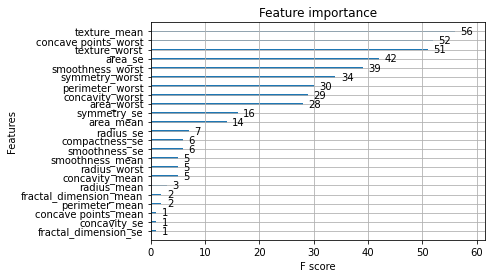

In [185]:
plot_importance(xgb_f)

In [194]:
pred_y = xgb_f.predict(X_test)
pred_y_proba = xgb_f.predict_proba(X_test)

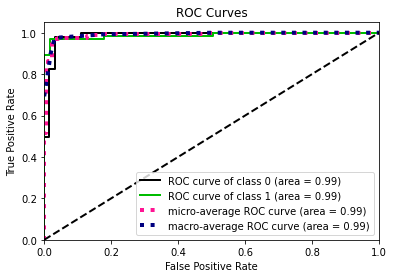

In [195]:
skplt.metrics.plot_roc(y_test, pred_y_proba)
plt.show()

In [188]:
recall = metrics.recall_score(y_test, pred_y,pos_label = 1)
print("Recall / Sensitivity / True Positive Rate: %.3f" % recall)

Recall / Sensitivity / True Positive Rate: 0.969


In [189]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_y).ravel()
specificity = tn / (tn+fp)
print("Specificity / True Negative Rate: %.3f" % specificity)

Specificity / True Negative Rate: 0.972


In [190]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test, pred_y, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.970


In [191]:
cf_matrix = confusion_matrix(y_test, pred_y)

In [192]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot:>

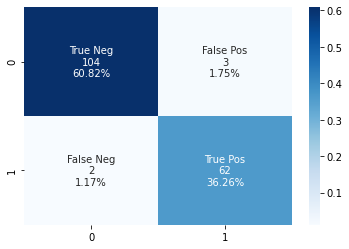

In [193]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, 
           fmt='', cmap='Blues')

In [118]:
pred_y_df = pd.DataFrame(pred_y, index= y_test.index)

In [119]:
test_data = X_test.join(y_test)
test_data = test_data.join(pred_y_df)

In [120]:
test_data.rename(columns = {0:'prediction'}, inplace = True)

In [121]:
test_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction
115,-0.624062,0.521345,-0.635937,-0.615148,0.093918,-0.489914,-0.697043,-0.743876,-0.451325,-0.121575,...,-0.587413,-0.523125,0.772888,-0.091382,-0.584763,-0.641591,-0.748637,0.081139,0,0
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,...,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,0,0
382,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,0.537611,...,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899,0,0
136,-0.686545,-0.609610,-0.710491,-0.657810,0.621966,-0.822323,-0.663898,-0.591176,-1.725504,-0.474559,...,-0.628517,-0.586937,-0.230954,-0.963529,-0.804010,-0.684074,-1.923146,-0.582743,0,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,-0.189520,-0.125580,-0.186552,-0.295187,0.792763,0.179262,-0.587439,-0.448793,-0.323542,0.052790,...,-0.159688,-0.282643,1.316453,0.369820,-0.032568,0.427773,0.998566,0.149854,0,0
142,-0.766069,-0.460677,-0.754153,-0.730619,0.913744,-0.179679,-0.859881,-0.781794,-0.608315,0.400103,...,-0.732768,-0.663758,0.391516,-0.477519,-0.936038,-0.770256,-0.512441,-0.165462,0,0
238,0.026330,1.992051,0.023930,-0.088136,-1.005588,-0.008357,0.269940,-0.124821,-1.714551,-0.213719,...,-0.141817,-0.204943,-1.063835,-0.074206,0.164131,-0.493589,-1.635181,-0.331709,0,0
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251,0,0


## g) XGB - Optimized Params + X_best from feature importance

In [122]:
xgb.fit(X_train_best, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07869889535964729, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=231, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
pred_y_best = xgb.predict(X_test_best)


In [124]:
recall = metrics.recall_score(y_test, pred_y_best,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.969


In [125]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_y_best).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.963


In [126]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test, pred_y_best, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.966


## h) XGB - Optimized Params + PCA

In [127]:
xgb_pca = XGBClassifier().set_params(**xgb_best_params)

In [128]:
xgb_pca.fit(pc_X_train, pc_y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07869889535964729, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=231, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
cval_spec = cross_val_score(xgb_pca, pc_X_train, pc_y_train.values.ravel(), cv= 10, scoring = spec_score).mean()
cval_spec

0.976

In [130]:
pred_y_pca = xgb_pca.predict(pc_X_test)

In [131]:
recall = metrics.recall_score(pc_y_test, pred_y_pca,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.889


In [132]:
tn, fp, fn, tp = confusion_matrix(pc_y_test, pred_y_pca).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.991


In [133]:
fpr, tpr, thresholds  = metrics.roc_curve(pc_y_test, pred_y_pca, pos_label=1)
print("AUC: %.3f" % metrics.auc(fpr, tpr) )

AUC: 0.940


In [134]:
cf_matrix = confusion_matrix(pc_y_test, pred_y_pca)

In [135]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

<AxesSubplot:>

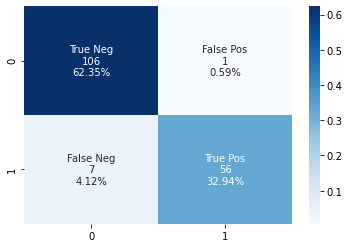

In [136]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, 
           fmt='', cmap='Blues')

## i) Neural Network + Original X_train

In [137]:
X_train.shape

(398, 30)

In [138]:
from keras import Input
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, UpSampling2D, Cropping2D, ZeroPadding2D, Dropout

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [139]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [140]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [141]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
398/398 [==============================] - ETA: 9s - loss: 1.3273 - acc: 0.600 - 0s 741us/step - loss: 0.8230 - acc: 0.5829
Epoch 2/150
398/398 [==============================] - ETA: 0s - loss: 0.7108 - acc: 0.600 - 0s 106us/step - loss: 0.6598 - acc: 0.6608
Epoch 3/150
398/398 [==============================] - ETA: 0s - loss: 0.5017 - acc: 0.700 - 0s 116us/step - loss: 0.5480 - acc: 0.7337
Epoch 4/150
398/398 [==============================] - ETA: 0s - loss: 0.4830 - acc: 0.800 - 0s 113us/step - loss: 0.5220 - acc: 0.7462
Epoch 5/150
398/398 [==============================] - ETA: 0s - loss: 0.4612 - acc: 0.800 - 0s 118us/step - loss: 0.4881 - acc: 0.7513
Epoch 6/150
398/398 [==============================] - ETA: 0s - loss: 0.3221 - acc: 0.900 - 0s 116us/step - loss: 0.4119 - acc: 0.8317
Epoch 7/150
398/398 [==============================] - ETA: 0s - loss: 0.3881 - acc: 0.800 - 0s 116us/step - loss: 0.4290 - acc: 0.7714
Epoch 8/150
398/398 [===========================

398/398 [==============================] - ETA: 0s - loss: 0.0517 - acc: 1.000 - 0s 113us/step - loss: 0.0810 - acc: 0.9573
Epoch 120/150
398/398 [==============================] - ETA: 0s - loss: 0.0683 - acc: 1.000 - 0s 113us/step - loss: 0.0854 - acc: 0.9648
Epoch 121/150
398/398 [==============================] - ETA: 0s - loss: 5.8576e-06 - acc: 1.000 - 0s 101us/step - loss: 0.0744 - acc: 0.9623
Epoch 122/150
398/398 [==============================] - ETA: 0s - loss: 0.0832 - acc: 1.000 - 0s 106us/step - loss: 0.0801 - acc: 0.9648
Epoch 123/150
398/398 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.800 - 0s 108us/step - loss: 0.0820 - acc: 0.9573
Epoch 124/150
398/398 [==============================] - ETA: 0s - loss: 0.1517 - acc: 0.900 - 0s 108us/step - loss: 0.0697 - acc: 0.9749
Epoch 125/150
398/398 [==============================] - ETA: 0s - loss: 0.1604 - acc: 1.000 - 0s 111us/step - loss: 0.0823 - acc: 0.9648
Epoch 126/150
398/398 [=====================

In [142]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
accuracy
#print('Accuracy: %.3f' % (accuracy*100))

398/398 [==============================] - ETA:  - 0s 131us/step


1.0

In [143]:
y_pred = model.predict(X_test)

In [144]:
#y_pred = y_pred.reshape(-1)

In [145]:
y_pred = (y_pred[:, 0] > 0.5).astype(np.int8)    

In [146]:
recall = metrics.recall_score(y_test, y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.953


In [147]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.972


In [148]:
confusion_matrix(y_test, y_pred)

array([[104,   3],
       [  3,  61]], dtype=int64)

In [149]:
auc = roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)

AUC: 0.963


## j) KNN + PCA

In [150]:
# Create specificity scoring function
from sklearn.metrics import make_scorer
spec_score = make_scorer(metrics.recall_score,pos_label=0)

In [151]:
knn_pca = KNeighborsClassifier().fit(pc_X_train, pc_y_train.values.ravel())

In [152]:
cval_spec = cross_val_score(knn_pca, pc_X_train, pc_y_train.values.ravel(), cv= 10, scoring = spec_score).mean()
print("Cross Validated Specificity: %.3f" % cval_spec)

Cross Validated Specificity: 0.988


In [153]:
y_pred = knn_pca.predict(pc_X_test)
y_pred_proba = knn_pca.predict_proba(pc_X_test)

In [154]:
recall = metrics.recall_score(pc_y_test, y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.857


In [155]:
tn, fp, fn, tp = confusion_matrix(pc_y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.981


In [156]:
auc = roc_auc_score(pc_y_test, y_pred)
print("AUC: %.3f" % auc)

AUC: 0.919


In [157]:
confusion_matrix(pc_y_test, y_pred)

array([[105,   2],
       [  9,  54]], dtype=int64)

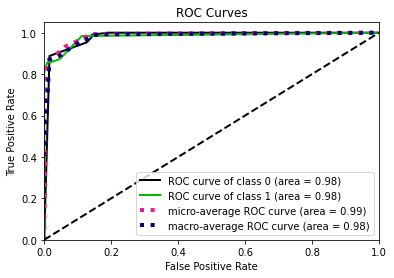

In [158]:
skplt.metrics.plot_roc(pc_y_test, y_pred_proba)
plt.show()

## k) KNN + X_best from feature importance

In [159]:
knn_best = KNeighborsClassifier()
knn_best.fit(X_train_best, y_train)

KNeighborsClassifier()

In [160]:
y_pred = knn_best.predict(X_test_best)

In [161]:
recall = metrics.recall_score(y_test, y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.953


In [162]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.972


In [163]:
auc = roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)

AUC: 0.963


In [164]:
confusion_matrix(y_test, y_pred)

array([[104,   3],
       [  3,  61]], dtype=int64)

### - KNN PCA Hyperparameter Tuning using Optuna

In [165]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [166]:
def objective_knn(trial: Trial, X, y):
    #train_class = data['diagnosis'].values
    
    #train_X, test_X, train_y, test_y = train_test_split(X, y,
    #                                                    stratify = train_class,
    #                                                    test_size = 0.25, 
    #                                                    random_state = random_seed)
    
    param = {
        "n_neighbors": trial.suggest_int('n_neighbors', 1,20),
        "weights" : trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p' : trial.suggest_int('p', 1, 2),
        'n_jobs':-1
        }
    
    
       
    model = KNeighborsClassifier()
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state= 1)
    
    return cross_val_score(model,
                           X, 
                           y, 
                           cv = cv, 
                           scoring = 'recall',
                           n_jobs=-1, 
                           error_score='raise').mean()

In [167]:
study_knn = optuna.create_study(direction = 'maximize', sampler = TPESampler(seed = random_seed))

# the code below just to be run once
study_knn.optimize(lambda trial: objective_knn(trial, pc_X_train, pc_y_train), n_trials = 75)

[I 2020-10-31 15:05:54,234] A new study created in memory with name: no-name-8198480c-f205-47a9-b503-6e0ace3ce8aa
[I 2020-10-31 15:05:54,368] Trial 0 finished with value: 0.9152380952380953 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.9152380952380953.
[I 2020-10-31 15:05:54,507] Trial 1 finished with value: 0.9152380952380953 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9152380952380953.
[I 2020-10-31 15:05:54,642] Trial 2 finished with value: 0.9152380952380953 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9152380952380953.
[I 2020-10-31 15:05:54,816] Trial 3 finished with value: 0.9152380952380953 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9152380952380953.
[I 2020-10-31 15:05:54,959] Trial 4 finished with value: 0.9152380952380953 and parameters: {'n_neighbors': 16, 'weights': '

In [168]:
print('Best trial: score {}, \nparams{}'.format(study_knn.best_trial.value, study_knn.best_trial.params))

Best trial: score 0.9152380952380953, 
params{'n_neighbors': 14, 'weights': 'uniform', 'p': 1}


In [169]:
# save knn best parameters
joblib.dump(study_knn.best_trial.params, 'knnpca_best.pkl', compress = 1)

['knnpca_best.pkl']

## l) KNN - Optimized Param + PCA

In [170]:
knn_pca_param = joblib.load('knnpca_best.pkl')

In [171]:
knn_pca_opt = KNeighborsClassifier().set_params(**knn_pca_param)

In [172]:
knn_pca_opt.fit(pc_X_train, pc_y_train.values.ravel())

KNeighborsClassifier(n_neighbors=14, p=1)

In [173]:
y_pred = knn_pca.predict(pc_X_test)
y_pred_proba = knn_pca.predict_proba(pc_X_test)

In [174]:
recall = metrics.recall_score(pc_y_test, y_pred,pos_label = 1)
print("Recall / Sensitivity: %.3f" % recall)

Recall / Sensitivity: 0.857


In [175]:
tn, fp, fn, tp = confusion_matrix(pc_y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: %.3f" % specificity)

Specificity: 0.981


In [176]:
auc = roc_auc_score(pc_y_test, y_pred)
print("AUC: %.3f" % auc)

AUC: 0.919


In [177]:
confusion_matrix(pc_y_test, y_pred)

array([[105,   2],
       [  9,  54]], dtype=int64)

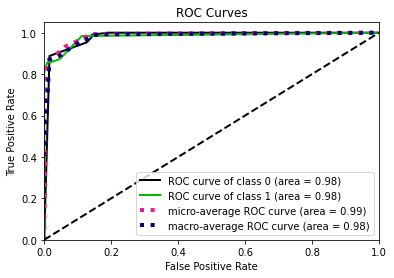

In [178]:
skplt.metrics.plot_roc(pc_y_test, y_pred_proba)
plt.show()